# Ворошилов Владислав
## Группа: ПИ20-3

In [29]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# from sklearn.datasets import load_boston

## 2. Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.

In [11]:
x_csv = 'data/10_x.csv'
y_csv = 'data/10_y.csv'

df_x = pd.read_csv(x_csv, names=[f"x{i+1}" for i in range(5)])
df_y = pd.read_csv(y_csv, names=["y"])

In [12]:
df_x

,x1,x2,x3,x4,x5
0,-1.590103,-1.023308,0.139891,1.351945,0.998685
1,-0.235861,-1.108386,2.553156,-1.911015,0.859437
2,0.037993,-2.136154,0.903113,1.095856,1.024503
3,-1.170747,-1.549586,1.827438,-0.519883,1.216156
4,1.060144,-1.086193,-1.251762,-0.571059,-0.107315
...,...,...,...,...,...
432,1.118841,0.345085,1.847087,1.138165,-1.680933
433,-0.749348,1.154446,-0.006490,-0.515298,0.514873
434,-0.064161,-0.576409,-0.831027,0.690439,-1.472990
435,-0.016386,0.189571,-0.952488,-0.283293,1.204598


In [13]:
df_y

,y
0,-20.511355
1,-137.884100
2,77.084302
3,-137.669480
4,-44.044335
...,...
432,212.106146
433,-32.541704
434,-51.624014
435,-12.461232


## 3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

In [16]:
df_x.describe()

,x1,x2,x3,x4,x5
count,437.000000,437.000000,437.000000,437.000000,437.000000
mean,0.047260,0.028446,0.044112,0.059077,0.029750
std,0.985409,0.978584,1.004005,0.993160,0.964815
min,-2.639479,-2.833294,-2.791713,-2.824406,-2.860318
25%,-0.613157,-0.606161,-0.652866,-0.607444,-0.601669
50%,-0.011851,0.029189,0.069595,0.014312,0.075974
75%,0.686657,0.669847,0.734619,0.686793,0.719638
max,2.877366,2.646400,3.443708,3.094108,2.512716


In [18]:
df_x.shape

(437, 5)

In [17]:
df_y.describe()

,y
count,437.000000
mean,13.576449
std,134.579270
min,-360.440671
25%,-72.961234
50%,13.121595
75%,92.082633
max,475.993698


In [19]:
df_y.shape

(437, 1)

## 4. Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.


In [79]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

In [80]:
x_test

,x1,x2,x3,x4,x5
259,0.912717,0.069663,0.220258,-1.328556,-1.208823
278,-0.413300,-0.650682,1.870193,-0.890002,0.931926
317,-0.427001,-0.036580,-0.069012,-1.376936,-1.299904
208,1.328682,1.035354,0.265787,0.882302,-0.537333
54,-0.832856,0.295472,-1.205917,0.083458,1.093886
...,...,...,...,...,...
132,-0.498183,0.325407,1.095575,0.756125,0.120969
49,-0.545419,-0.685773,0.997481,-1.284796,-1.032659
52,0.178796,0.234982,2.695245,0.116946,-0.894148
74,-0.069259,0.597770,-0.428445,-1.033485,0.619749


In [81]:
x_train

,x1,x2,x3,x4,x5
45,0.629444,0.608499,1.084646,0.596746,0.842438
263,-2.047409,-0.711140,0.891841,-0.364689,1.357433
4,1.060144,-1.086193,-1.251762,-0.571059,-0.107315
235,0.102227,0.065656,-2.791713,-1.244295,-0.378302
221,-0.399637,0.601875,0.166467,-0.002985,0.628878
...,...,...,...,...,...
323,-0.115541,-0.891207,0.041696,0.657676,0.526878
192,1.068260,0.532711,0.184528,-0.174067,0.115630
117,-0.346477,1.520950,1.042326,0.641008,1.528409
47,-0.468302,0.261999,-1.636097,-0.486011,-2.106312


In [82]:
y_test

,y
259,-73.536590
278,-39.112744
317,-196.387389
208,232.787211
54,-55.314879
...,...
132,82.731321
49,-217.207459
52,92.839634
74,-67.910420


In [83]:
y_train

,y
45,208.808271
263,-169.839823
4,-44.044335
235,-206.233361
221,20.495820
...,...
323,33.566776
192,127.816326
117,205.241433
47,-203.594376


## 5. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

In [87]:
def regression(arg_train, arg_test, goal_train, goal_test):
    # Создание модели
    trained_model = LinearRegression() 
    # Обучение на тренировочном наборе
    trained_model.fit(arg_train.values.reshape(-1,1), goal_train.values)
    # Расчёт значений для тестовом наборе
    y_predict = trained_model.predict(arg_test.values.reshape((-1,1)))
    
    # График
    plt.title(f'Регрессия для признака {arg_train.name}')
    plt.xlabel(f'{arg_train.name}')
    plt.ylabel('y')
    plt.plot(arg_test, y_predict, color='red')
    plt.scatter(arg_test, goal_test, color='black')
    plt.grid()
    # Score
    print(f"Score: {trained_model.score(arg_train.values.reshape(-1, 1), goal_train.values)}")
    
    #MSE
    print(f"MSE: {metrics.mean_squared_error(goal_test, y_predict)}")
    

Score: 0.35287598787374386
MSE: 12879.760247537326


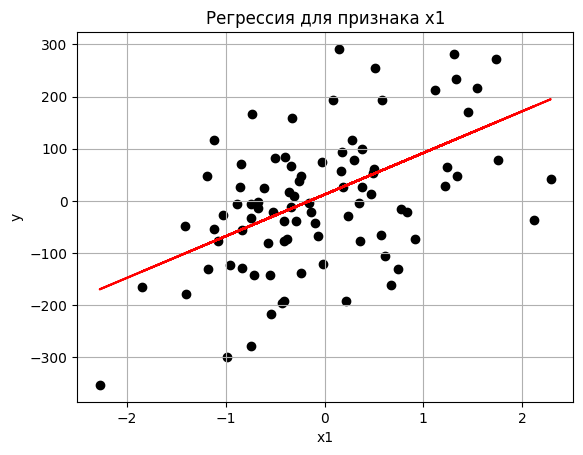

In [88]:
regression(x_train["x1"], x_test["x1"], y_train, y_test)

Score: 0.10808022124991934
MSE: 15074.281099750597


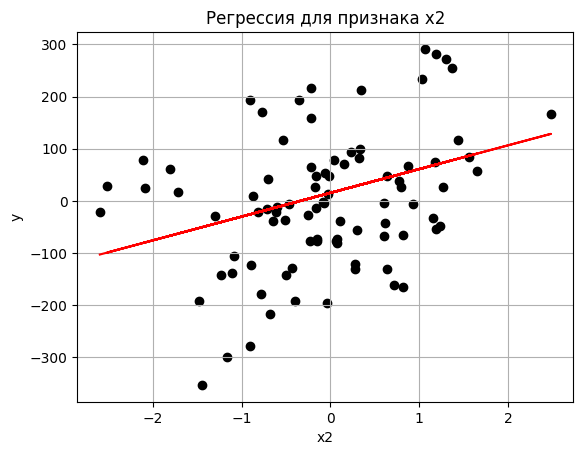

In [89]:
regression(x_train["x2"], x_test["x2"], y_train, y_test)

Score: 0.026399290980424928
MSE: 16791.8457069244


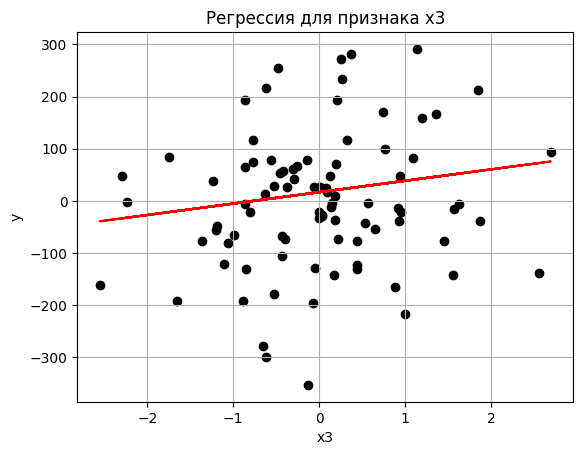

In [90]:
regression(x_train["x3"], x_test["x3"], y_train, y_test)

Score: 0.43670467696630333
MSE: 8785.262749356481


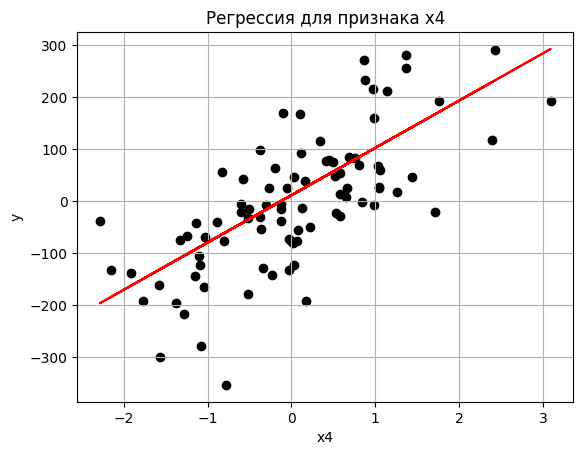

In [91]:
regression(x_train["x4"], x_test["x4"], y_train, y_test)

Score: 0.02798381876694156
MSE: 16604.62925024427


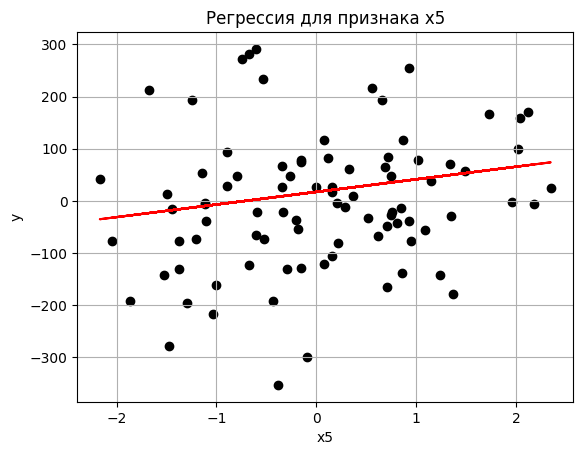

In [92]:
regression(x_train["x5"], x_test["x5"], y_train, y_test)

## 6. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [53]:
# Создание модели линейной регрессии
whole_model = LinearRegression() 
# Обучение на тренировочном наборе
whole_model.fit(x_train, y_train)
# Расчёт значений для тестового набора
y_predict = whole_model.predict(x_test)

print(f"Score for the whole model: {whole_model.score(x_train, y_train)}")

Score for the whole model: 0.9959297210197747


In [76]:
coef_list = whole_model.intercept_.tolist() + whole_model.coef_.tolist()[0][:]
print("Model: y = {:.2f} + {:.2f}*x1 + {:.2f}*x2 + {:.2f}*x3 + {:.2f}*x4 + {:.2f}*x5".format(*coef_list))


Model: y = 0.81 + 85.96*x1 + 48.06*x2 + 31.94*x3 + 89.15*x4 + 33.47*x5


In [78]:
mse = metrics.mean_squared_error(y_test, y_predict)
print("MSE: {}".format(mse))

MSE: 105.8078758293534


## Дополнительные задания

### 1. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

### 2. Постройте сводную таблицу показателей точности всех построенных моделей по тестовой и обучающей выборке. Сделайте вывод, какие модели переобученнные, какие - недообученные.

### 3. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

### 4. (*) Замерьте время обучения на разных объемах данных и количестве признаков. Сделайте вывод о зависимости скорости обучения от объема обучающей выборки.